In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_dP_r

In [3]:
#Read data ---#1
#Input = "2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt"
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
BJD0 = 2448773.21461 - 2400000
P0 = 0.0623628426

#Schwope_2002
#BJD0 = 2448773.215071 - 2400000
#dBJD0 = 0.000018
#P0 = 0.06236283691
#dP0 = 0.00000000070

In [5]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

#len_x = len(x)
#print(len_x)
#print(x)

t = BJD_time
len_x = len(t)

Epoch = (t-BJD0)/P0

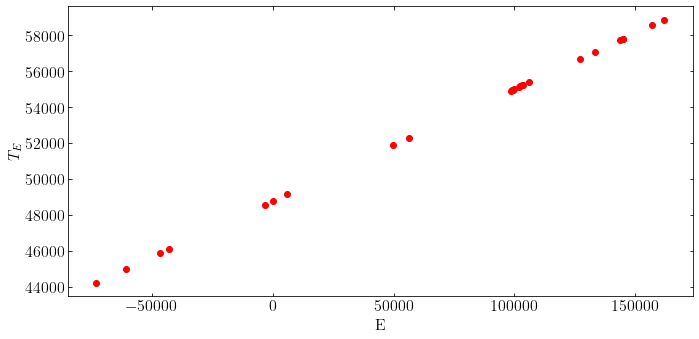

In [6]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

plt.plot(Epoch, t, 'o', color='red')


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [7]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(Epoch,m,c):
    return m*Epoch + c

params, covariance = curve_fit(f = linear_fit, xdata = Epoch, ydata = t)

Period = params[0]
T0 = params[1]

dPeriod = covariance[0,0]
dT0 = covariance[1,1]


print('Slope (P) is ', Period)
print('The error of the slope (dP) is ', dPeriod)
print('Intercept (T0) is ', T0)
print('The error of the intercept (dT0) is ', dT0)
#print(covariance)

Slope (P) is  0.062362842599999996
The error of the slope (dP) is  0.0
Intercept (T0) is  48773.21461000014
The error of the intercept (dT0) is  0.0


In [8]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(Epoch), np.amax(Epoch)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*Epoch + T0 #just only our data point
Residual = t - ys
print(t)
print(ys)
print(Residual)

#np.savetxt("Linear_fit_period_year_2017KG5.out", np.c_[x, Residual, dy])

[44214.61562 44993.45298 45851.40631 46086.96681 48560.5578  48773.71401
 49143.77505 51870.83925 52284.71018 54919.76589 54941.30349 54970.67822
 54999.31317 55135.97098 55159.94602 55208.61678 55245.62567 55389.66308
 56712.00516 57100.74409 57748.32002 57811.3377  57811.3377  58561.25098
 58884.35291]
[44214.61562 44993.45298 45851.40631 46086.96681 48560.5578  48773.71401
 49143.77505 51870.83925 52284.71018 54919.76589 54941.30349 54970.67822
 54999.31317 55135.97098 55159.94602 55208.61678 55245.62567 55389.66308
 56712.00516 57100.74409 57748.32002 57811.3377  57811.3377  58561.25098
 58884.35291]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


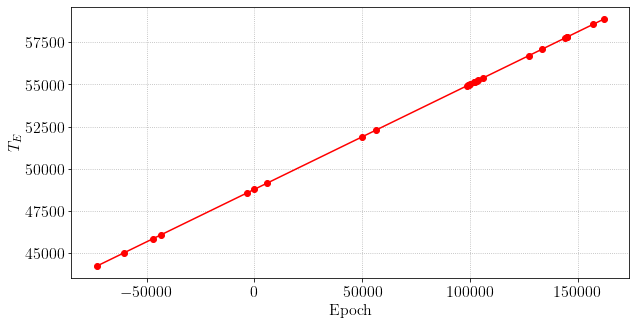

In [9]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.plot(Epoch, t, 'o', color='red')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

In [10]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [11]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [12]:
#Parameters
m = 0
c = 0
K = 10       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0  
    OC = O-C
    print(x[i], MAno[i], EAno[i], C[i], O[i], OC[i])
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  C[i], O[i], OC[i]))
    
data_out = output
f = open("K_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 44214.61562 44217.024297853255 2.4086778532582684
44993.45298 1.3454457543433849 1.7304837947369647 44993.45298 45000.7237384763 7.2707584762974875
45851.40631 1.8729095270735001 2.1904097107400955 45851.40631 45862.467174655096 11.060864655097248
46086.96681 2.017730493076619 2.3067856169900147 46086.96681 46098.77309653813 11.806286538128916
48560.5578 3.5384771236382466 3.4282176707010223 48560.5578 48573.206473269354 12.648673269352003
48773.71401 3.6695240871222086 3.52399532486365 48773.71401 48785.8810740941 12.167064094093803
49143.77505 3.8970350547628696 3.6927893114212127 49143.77505 49154.91010846346 11.135058463463793
51870.83925 5.573615261531505 5.235835707425898 51870.83925 51868.096168398806 -2.7430816011910792
52284.71018 5.828060246506533 5.574122319177708 52284.71018 52279.84761135601 -4.862568643991835
54919.76589 1.164888962876034 1.5548393120535615 54919.76589 54925.34998600453 5.584096004524326
54941.30349 1.178130

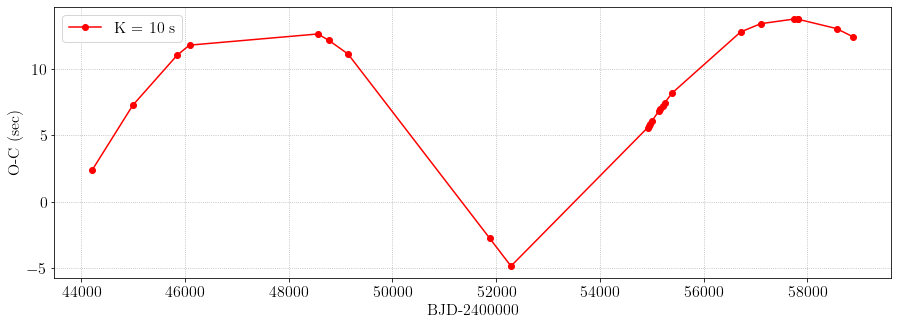

In [13]:
InputFile_out = "K_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [14]:
#Parameters
m = 0
c = 0
K = 20       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0  
    OC = O-C
    print(x[i], MAno[i], EAno[i], C[i], O[i], OC[i])
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  C[i], O[i], OC[i]))
    
data_out = output
f = open("K_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 44214.61562 44219.43297570652 4.817355706523813
44993.45298 1.3454457543433849 1.7304837947369647 44993.45298 45007.9944969526 14.541516952594975
45851.40631 1.8729095270735001 2.1904097107400955 45851.40631 45873.52803931019 22.121729310194496
46086.96681 2.017730493076619 2.3067856169900147 46086.96681 46110.579383076256 23.61257307625783
48560.5578 3.5384771236382466 3.4282176707010223 48560.5578 48585.855146538706 25.297346538704005
48773.71401 3.6695240871222086 3.52399532486365 48773.71401 48798.04813818819 24.334128188187606
49143.77505 3.8970350547628696 3.6927893114212127 49143.77505 49166.04516692693 22.27011692693486
51870.83925 5.573615261531505 5.235835707425898 51870.83925 51865.35308679761 -5.4861632023894344
52284.71018 5.828060246506533 5.574122319177708 52284.71018 52274.98504271202 -9.72513728798367
54919.76589 1.164888962876034 1.5548393120535615 54919.76589 54930.93408200905 11.168192009048653
54941.30349 1.1781301303

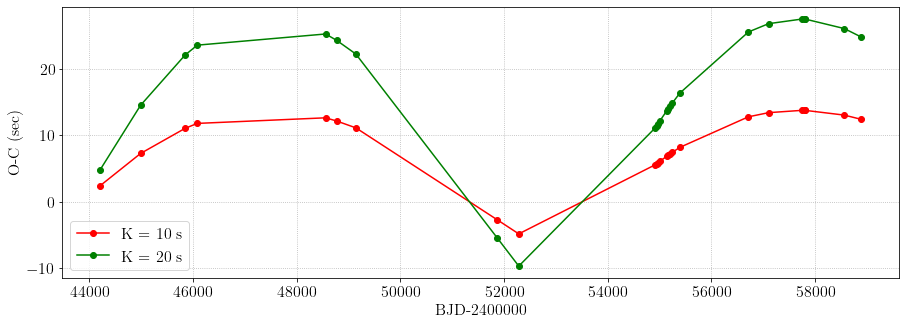

In [15]:
InputFile_out = "K_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [16]:
#Parameters
m = 0
c = 0
K = 30       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0  
    OC = O-C
    print(x[i], MAno[i], EAno[i], C[i], O[i], OC[i])
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  C[i], O[i], OC[i]))
    
data_out = output
f = open("K_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 44214.61562 44221.84165355978 7.226033559782081
44993.45298 1.3454457543433849 1.7304837947369647 44993.45298 45015.265255428894 21.812275428892463
45851.40631 1.8729095270735001 2.1904097107400955 45851.40631 45884.58890396529 33.182593965291744
46086.96681 2.017730493076619 2.3067856169900147 46086.96681 46122.38566961439 35.41885961439402
48560.5578 3.5384771236382466 3.4282176707010223 48560.5578 48598.50381980806 37.94601980805601
48773.71401 3.6695240871222086 3.52399532486365 48773.71401 48810.215202282285 36.50119228228141
49143.77505 3.8970350547628696 3.6927893114212127 49143.77505 49177.180225390395 33.405175390398654
51870.83925 5.573615261531505 5.235835707425898 51870.83925 51862.61000519642 -8.229244803580514
52284.71018 5.828060246506533 5.574122319177708 52284.71018 52270.122474068026 -14.587705931975506
54919.76589 1.164888962876034 1.5548393120535615 54919.76589 54936.518178013575 16.75228801357298
54941.30349 1.1781301

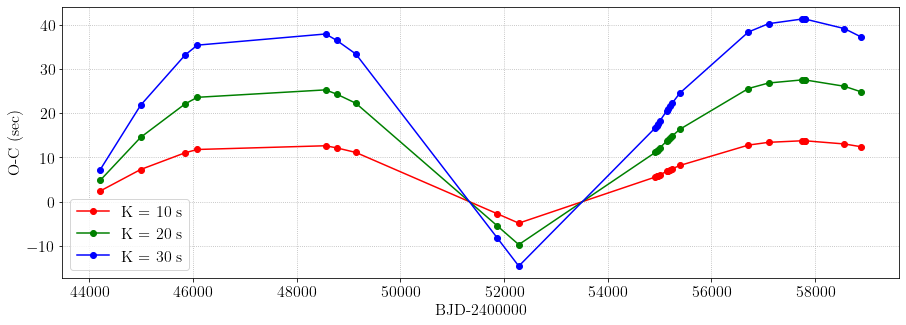

In [17]:
InputFile_out = "K_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [18]:
#Parameters
m = 0
c = 0
K = 40       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0  
    OC = O-C
    print(x[i], MAno[i], EAno[i], C[i], O[i], OC[i])
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  C[i], O[i], OC[i]))
    
data_out = output
f = open("K_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 44214.61562 44224.25033141304 9.63471141304035
44993.45298 1.3454457543433849 1.7304837947369647 44993.45298 45022.53601390519 29.08303390518995
45851.40631 1.8729095270735001 2.1904097107400955 45851.40631 45895.64976862039 44.24345862038899
46086.96681 2.017730493076619 2.3067856169900147 46086.96681 46134.19195615252 47.22514615252294
48560.5578 3.5384771236382466 3.4282176707010223 48560.5578 48611.15249307741 50.59469307740801
48773.71401 3.6695240871222086 3.52399532486365 48773.71401 48822.38226637638 48.66825637637521
49143.77505 3.8970350547628696 3.6927893114212127 49143.77505 49188.31528385386 44.540233853862446
51870.83925 5.573615261531505 5.235835707425898 51870.83925 51859.86692359522 -10.972326404778869
52284.71018 5.828060246506533 5.574122319177708 52284.71018 52265.259905424035 -19.45027457596734
54919.76589 1.164888962876034 1.5548393120535615 54919.76589 54942.1022740181 22.336384018097306
54941.30349 1.17813013037817

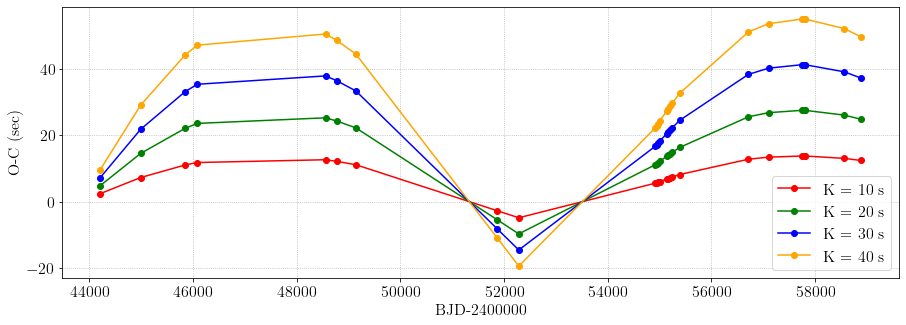

In [19]:
InputFile_out = "K_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
plt.plot(x_d, y_d, '-o', color='orange',label='K = 40 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [20]:
#Parameters
m = 0
c = 0
K = 50       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0  
    OC = O-C
    print(x[i], MAno[i], EAno[i], C[i], O[i], OC[i])
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  C[i], O[i], OC[i]))
    
data_out = output
f = open("K_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 44214.61562 44226.6590092663 12.043389266305894
44993.45298 1.3454457543433849 1.7304837947369647 44993.45298 45029.80677238149 36.35379238148744
45851.40631 1.8729095270735001 2.1904097107400955 45851.40631 45906.710633275485 55.30432327548624
46086.96681 2.017730493076619 2.3067856169900147 46086.96681 46145.99824269065 59.031432690651855
48560.5578 3.5384771236382466 3.4282176707010223 48560.5578 48623.80116634676 63.24336634676001
48773.71401 3.6695240871222086 3.52399532486365 48773.71401 48834.54933047047 60.835320470469014
49143.77505 3.8970350547628696 3.6927893114212127 49143.77505 49199.45034231733 55.675292317333515
51870.83925 5.573615261531505 5.235835707425898 51870.83925 51857.12384199403 -13.715408005969948
52284.71018 5.828060246506533 5.574122319177708 52284.71018 52260.39733678004 -24.312843219959177
54919.76589 1.164888962876034 1.5548393120535615 54919.76589 54947.686370022624 27.920480022621632
54941.30349 1.17813013

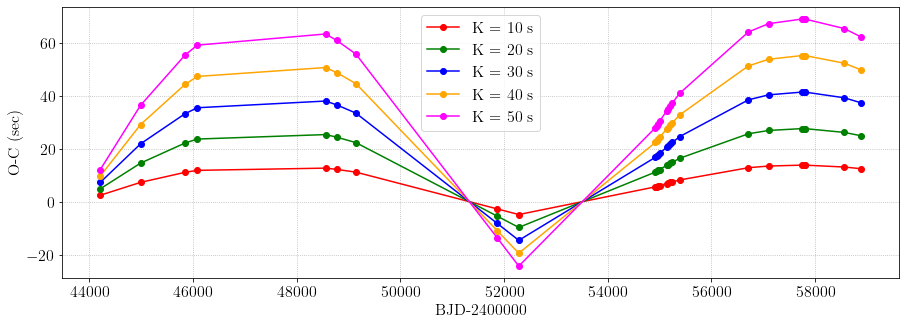

In [21]:
InputFile_out = "K_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
plt.plot(x_d, y_d, '-o', color='orange',label='K = 40 s')
plt.plot(x_e, y_e, '-o', color='magenta',label='K = 50 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(x_a[0],x_a[-1])
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf", format='pdf', dpi=1200)
plt.show()